# Constrained Optimization with Lagrange Multipliers
**Reference**: [Lagrange Multipliers | Geometric Meaning & Full Example](https://www.youtube.com/watch?v=8mjcnxGMwFo)  

In this notebook, we explore the geometric intuition and the algebraic method behind finding maxima or minima of a function subject to a constraint, using **Lagrange Multipliers**.

---

In [22]:
# Just some imports for graphs and shi...
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make plots look a bit nicer
plt.style.use('seaborn-v0_8-whitegrid')
sympy.init_printing()

## 1. Motivation & Geometry

### 1.1. The Problem Statement

We want to **maximize** (and also find possible minima of) the function 

$f(x, y) = x \cdot y + 1$

subject to the constraint (which is a circle of radius 1)

$g(x, y) = x^2 + y^2 - 1 = 0$.

### 1.2. Why Is This Interesting?

- The function $f(x,y) = xy + 1$ is **unbounded** if there is **no restriction** (you can make $xy$ as large or as small as you want by going far away in the $xy$-plane).
- **However**, if you restrict $(x,y)$ to lie on the circle $x^2 + y^2 = 1$, then you only get certain values of $xy$. So within that constraint, $f(x,y)$ attains a maximum and a minimum.

### 1.3. Geometric Intuition

1. **Level Curves of $f$**:
   - A level curve of $f$ is defined by $xy + 1 = c$.
   - For different values of $c$, the set of $(x,y)$ satisfying $xy + 1 = c$ forms a hyperbola (or rectangular hyperbola) in the 2D plane.  
   - In 3D, each "level set" is a contour at height $c$.

2. **Constraint Curve**:
   - The constraint $g(x,y) = x^2 + y^2 - 1 = 0$ is just the **unit circle** in 2D.
   - Geometrically, we only consider points $(x, y)$ **on this circle**.

3. **Where the Max/Min Happens**:
   - If you imagine sliding the level curves $xy + 1 = c$ up or down, at some maximum (or minimum), a level curve will be **tangent** to the constraint circle.  
   - When two curves are tangent, their **tangent lines** coincide. Equivalently, their **normal vectors** coincide (up to a scalar multiple).  

### 1.4. Gradient & Lagrange Multipliers

- **Gradient** $\nabla f$ of $f$ points in the direction of greatest increase of $f$. 
- **Gradient** $\nabla g$ of the constraint function $g$ is **normal** to the curve $g(x,y) = 0$.
- **Tangency condition** implies $\nabla f$ is **parallel** to $\nabla g$ at the extremum on the constraint. Mathematically:

$\nabla f(x,y) = \lambda \, \nabla g(x,y)$

for some scalar $\lambda$, called the **Lagrange multiplier**.

## 2. Visualizing the Function and Constraint

First, let's do a couple of plots:
1. **3D surface** of $z = f(x,y) = xy + 1$.
2. **Constraint circle** in the $(x,y)$ plane and example **level curves** of $f$.

We will restrict $(x,y)$ to a certain range for plotting.

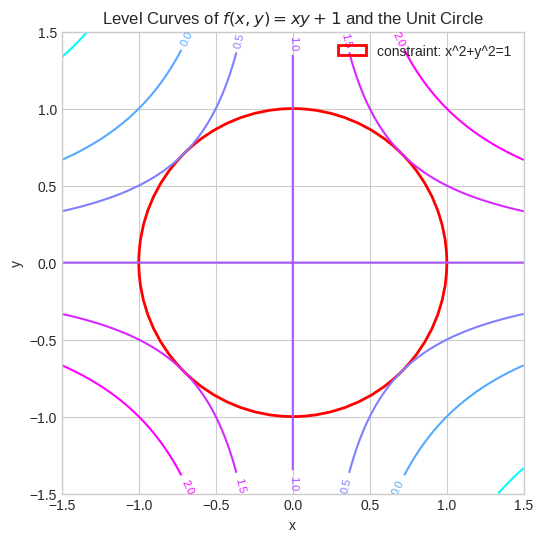

In [36]:
# ---- 2D PLOT: The level curves of f and the constraint circle ----

# Setup a grid in the xy-plane
x_vals = np.linspace(-1.5, 1.5, 300)
y_vals = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x_vals, y_vals)
F = X*Y + 1  # XY + 1
G = X**2 + Y**2 - 1  # constraint

# We'll plot a few contour levels of f
fig, ax = plt.subplots(figsize=(6, 6))
# Choose levels around 0.5, 1, 1.5, 2 etc. just for demonstration
CS = ax.contour(X, Y, F, levels=[-1, 0, 0.5, 1, 1.5, 2], cmap='cool')

ax.clabel(CS, inline=True, fontsize=8)
ax.set_title("Level Curves of $f(x,y)=xy+1$ and the Unit Circle")

# Now plot the constraint circle x^2 + y^2 = 1
circle = plt.Circle((0, 0), 1.0, color='red', fill=False, lw=2, label='constraint: x^2+y^2=1')
ax.add_artist(circle)

ax.set_aspect('equal', 'box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.legend()
plt.show()

**Observation**:  
- The red circle is our **constraint**.  
- The contour curves (in various colors) are **level sets** of $f(x,y)$.  
- Notice that as you move outward to certain regions, the hyperbolas might not intersect the circle at all. Where they become tangent to the circle, that's typically an extremum under the constraint.

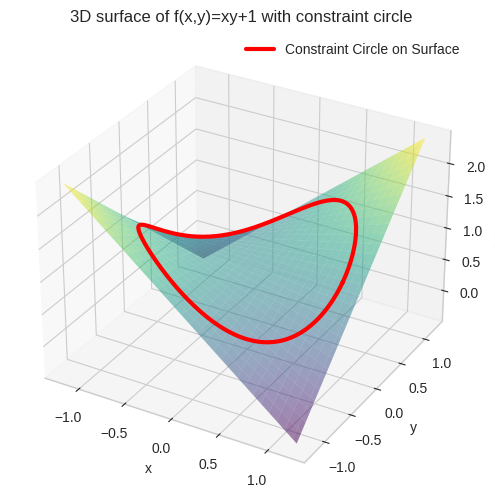

In [46]:
# ---- 3D PLOT: The surface z=f(x,y) and the constraint circle "projected" in 3D ----

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot for f(x,y)
# We'll use a smaller grid to keep the rendering somewhat quick.
x_vals_3d = np.linspace(-1.2, 1.2, 60)
y_vals_3d = np.linspace(-1.2, 1.2, 60)
X_3d, Y_3d = np.meshgrid(x_vals_3d, y_vals_3d)
Z_3d = X_3d * Y_3d + 1

ax.plot_surface(X_3d, Y_3d, Z_3d, alpha=0.5, cmap='viridis', edgecolor='none')

# Now let's plot the circle x^2+y^2=1 in 3D, but at the actual z = f(x,y).
# Actually, for reference, let's just plot it at z=0 for a "projection" or
# we can parametric plot x(t)=cos(t), y(t)=sin(t), z(t)=f(x,y).

theta = np.linspace(0, 2*np.pi, 200)
xc = np.cos(theta)
yc = np.sin(theta)
zc = xc*yc + 1  # the circle plugged into f

# We can plot the "space curve" lying on the surface
ax.plot(xc, yc, zc, color='red', lw=3, label='Constraint Circle on Surface')

# Axis labels
ax.set_title("3D surface of f(x,y)=xy+1 with constraint circle")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z = xy + 1")
ax.legend()
plt.show()

From this 3D perspective, you can (somewhat) visualize how the circle (in red) traces out a curve on the surface $z = xy + 1$. We want to find the highest and lowest points on that red curve.

---

## 3. Lagrange Multipliers: Symbolic Computation

Recall the **Lagrange multiplier** condition:

$\nabla f(x,y) = \lambda \, \nabla g(x,y), \quad\text{along with}\quad g(x,y) = 0.$

For our functions:

$f(x,y) = xy + 1, \quad g(x,y) = x^2 + y^2 - 1.$

We compute:
- $\nabla f(x,y) = \left(\frac{\partial}{\partial x} (xy+1), \frac{\partial}{\partial y} (xy+1)\right) = (y, x).$
- $\nabla g(x,y) = \left(\frac{\partial}{\partial x} (x^2 + y^2 -1), \frac{\partial}{\partial y} (x^2 + y^2 -1)\right) = (2x, 2y).$

The Lagrange multiplier system becomes:

\[
\begin{cases}
y = \lambda \cdot 2x, \\
x = \lambda \cdot 2y, \\
x^2 + y^2 - 1 = 0.
\end{cases}
\]

We can use **sympy** to solve these equations directly.

In [50]:
x, y, lam = sympy.symbols('x y lam', real=True)

f = x*y + 1
g = x**2 + y**2 - 1

# Gradients
grad_f = [sympy.diff(f, x), sympy.diff(f, y)]
grad_g = [sympy.diff(g, x), sympy.diff(g, y)]

# System:
# grad_f[0] - lam*grad_g[0] = 0
# grad_f[1] - lam*grad_g[1] = 0
# g(x,y) = 0

solutions = sympy.solve([
    grad_f[0] - lam*grad_g[0],  # y - lam*2x = 0
    grad_f[1] - lam*grad_g[1],  # x - lam*2y = 0
    g
], [x, y, lam], dict=True)

solutions

The solutions from sympy will typically come in a list, containing potential $(x,y,\lambda)$ triplets. Let's see how many solutions we get and interpret them.  

We'll then plug these solutions back into $f(x,y)$ to figure out which correspond to maxima and which to minima.

---

In [53]:
# Evaluate f(x,y) at each solution to identify max/min
results = []
for sol in solutions:
    x_sol = sol[x]
    y_sol = sol[y]
    val = f.subs({x: x_sol, y: y_sol})
    results.append((x_sol, y_sol, val))

results

We expect to see something like four points, corresponding to:

\[
$(x, y) = \left(\pm \frac{1}{\sqrt{2}}, \pm \frac{1}{\sqrt{2}}\right)$
\]

with appropriate combinations of plus and minus. These should yield either the maximum or minimum values for \(f\) on the unit circle.

---

## 4. Analyzing the Solutions

From geometry and from the algebra:

1. If $(x, y) = \left(\tfrac{1}{\sqrt{2}}, \tfrac{1}{\sqrt{2}}\right)$, then  
   
   $$
   f\left(\tfrac{1}{\sqrt{2}}, \tfrac{1}{\sqrt{2}}\right) 
     = \tfrac{1}{\sqrt{2}} \cdot \tfrac{1}{\sqrt{2}} + 1 
     = \tfrac{1}{2} + 1 
     = 1.5.
   $$

2. Similarly, $(-\tfrac{1}{\sqrt{2}}, -\tfrac{1}{\sqrt{2}})$ also yields $f=1.5$.  
   - These two points give the same **maximum** value **1.5**.

3. If $(x, y) = \left(\tfrac{1}{\sqrt{2}}, -\tfrac{1}{\sqrt{2}}\right)$, then  

   $$
   f = \tfrac{1}{\sqrt{2}} \cdot \left(-\tfrac{1}{\sqrt{2}}\right) + 1 
     = -\tfrac{1}{2} + 1 
     = 0.5.
   $$

4. $(-\tfrac{1}{\sqrt{2}}, \tfrac{1}{\sqrt{2}})$ likewise yields $f=0.5$.  
   - These two points give the same **minimum** value **0.5**.

So under the constraint $x^2 + y^2 = 1$, the **maximum** of $xy + 1$ is $\boxed{1.5}$ at $\pm(1/\sqrt{2}, 1/\sqrt{2})$, and the **minimum** is $\boxed{0.5}$ at $\pm(1/\sqrt{2}, -1/\sqrt{2})$.

---

## 5. Visual Confirmation

Let's mark these critical points on our earlier 2D contour plot of \(f\) and the circle.

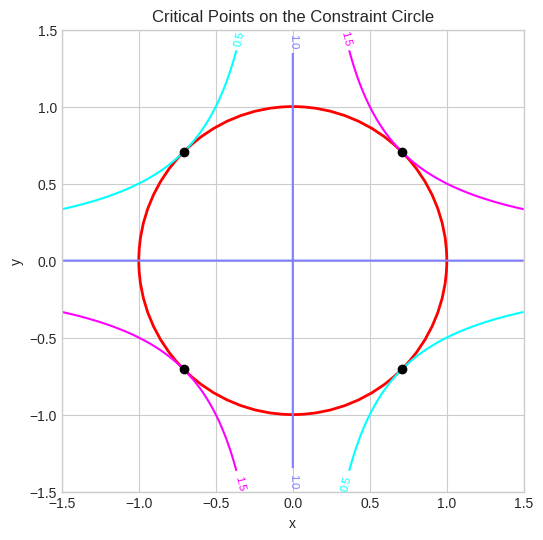

In [61]:
critical_points = [
    (1/np.sqrt(2), 1/np.sqrt(2)),
    (-1/np.sqrt(2), -1/np.sqrt(2)),
    (1/np.sqrt(2), -1/np.sqrt(2)),
    (-1/np.sqrt(2), 1/np.sqrt(2))
]

fig, ax = plt.subplots(figsize=(6, 6))
# Reuse our previous data for contour
CS = ax.contour(X, Y, F, levels=[0.5, 1.0, 1.5], cmap='cool')
ax.clabel(CS, inline=True, fontsize=8)
ax.set_title("Critical Points on the Constraint Circle")

# Plot the circle
circle = plt.Circle((0, 0), 1.0, color='red', fill=False, lw=2)
ax.add_artist(circle)

# Plot the critical points
for (xc, yc) in critical_points:
    ax.plot(xc, yc, 'ko', markersize=6)

ax.set_aspect('equal', 'box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## 6. Conclusion

Using **Lagrange multipliers**, we found:

- **Maxima** of $xy + 1$ subject to $x^2 + y^2 = 1$ is **1.5** (achieved at $\pm (1/\sqrt{2}, 1/\sqrt{2})$).  
- **Minima** is **0.5** (achieved at $\pm (1/\sqrt{2}, -1/\sqrt{2})$).

### Key Takeaways

1. **Geometric** viewpoint: a level curve of $f(x,y)$ that is just **tangent** to the constraint curve $g(x,y)=0$ will give a candidate point for maximum/minimum.  
2. **Algebraic** viewpoint: $\nabla f = \lambda \nabla g$ along with $g=0$ forms a system of equations in $x,y,\lambda$.  

This example aligns with the explanation and visual demonstration from the [YouTube video](https://www.youtube.com/watch?v=8mjcnxGMwFo). 

---

### Further Exploration  
- Try different functions $f$ and different constraint shapes (e.g., ellipses, surfaces in 3D, etc.) to see how the geometric idea generalizes.  
- Explore second-derivative tests for confirming maxima/minima under constraints (though often, simply checking the function values at the candidates is sufficient).

### Reference  
- [Lagrange Multipliers | Geometric Meaning & Full Example](https://www.youtube.com/watch?v=8mjcnxGMwFo) by Dr. Trefor Bazett  
- Any standard multivariable calculus textbook (e.g., Stewart, Thomas, Marsden, etc.) will have a chapter on Lagrange multipliers.

---

# Problem Set 1: 3D Visualizations

In this notebook, we visualize each problem from **Problem Set 1** in three dimensions using Plotly, which
provides interactive 3D plots (rotate, zoom, etc.) right inside Jupyter.

## Setup

We begin by importing necessary libraries (NumPy and Plotly) and defining a helper function 
`plot_3d_surface_and_feasible(...)` to simplify the visualization steps. 

In [13]:
import numpy as np
import plotly.graph_objects as go

def plot_3d_surface_and_feasible(x1, x2, fvals, feasible_mask,
                                 title="3D Plot",
                                 x1_name="x1", x2_name="x2", z_name="f(x)"):
    """
    Plots a 3D surface for fvals over the entire (x1, x2) grid,
    then a 3D scatter for feasible points given by feasible_mask.
    """
    fig = go.Figure()

    # Surface of the objective function for the entire domain
    fig.add_trace(go.Surface(
        x=x1,
        y=x2,
        z=fvals,
        colorscale="viridis",
        opacity=0.7,
        name=z_name,
        showscale=True
    ))

    # Feasible points, plotted as 3D scatter
    feasible_x1 = x1[feasible_mask]
    feasible_x2 = x2[feasible_mask]
    feasible_f  = fvals[feasible_mask]

    fig.add_trace(go.Scatter3d(
        x=feasible_x1,
        y=feasible_x2,
        z=feasible_f,
        mode='markers',
        marker=dict(size=3, color='red'),
        name='Feasible Points'
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x1_name,
            yaxis_title=x2_name,
            zaxis_title=z_name
        ),
        width=800,
        height=700
    )

    fig.show()

## Problem 1

### Objective Function  
\[
$f(x_1, x_2) = \left(x_1 - \frac{3}{2}\right)^2 + \left(x_2 - \frac{1}{2}\right)^4$
\]

### Constraints  
$
\begin{aligned}
    x_1 + x_2 &\leq 1  && \quad (1 - x_1 - x_2 \geq 0) \\
    x_1 - x_2 &\leq 1  && \quad (x_1 - x_2 - 1 \leq 0) \\
    x_2 - x_1 &\leq 1  && \quad (x_2 - x_1 - 1 \leq 0) \\
    x_1 + x_2 &\geq -1 && \quad (1 + x_1 + x_2 \geq 0)
\end{aligned}
$

We will create a meshgrid, compute $( f(x_1,x_2) )$, then identify which grid points satisfy  
all the inequalities (the feasible region). Finally, we visualize both the objective surface  
and the feasible set in 3D.

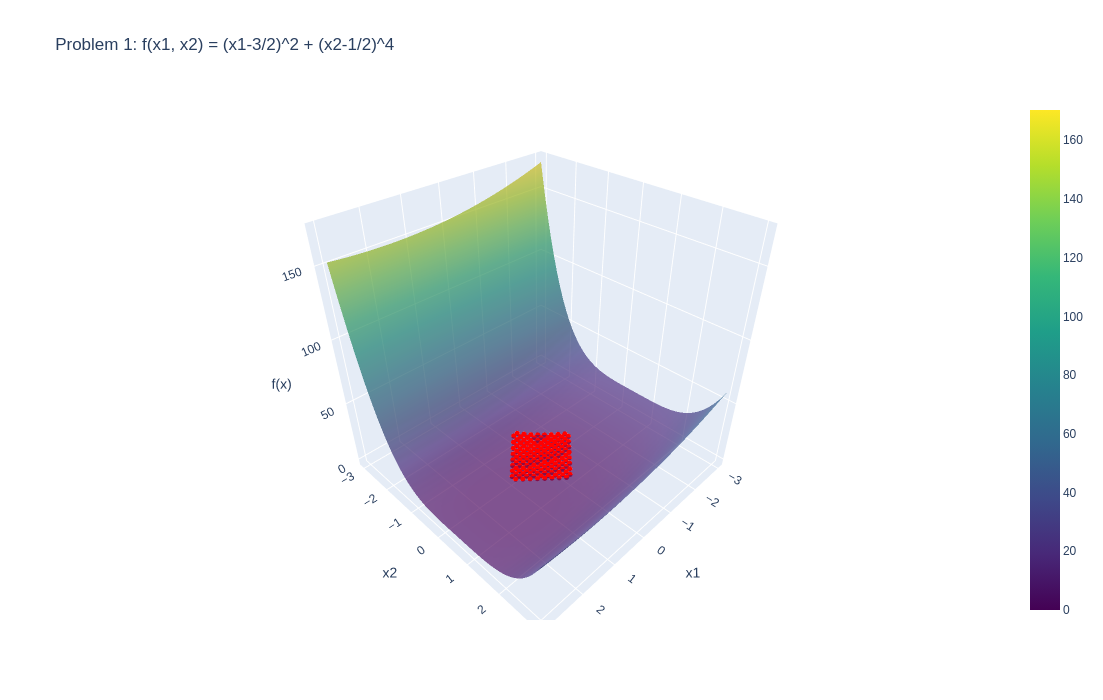

In [16]:
# --- Problem 1 ---
N = 50
x1_vals = np.linspace(-3, 3, N)
x2_vals = np.linspace(-3, 3, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# Objective
f1 = (x1_grid - 1.5)**2 + (x2_grid - 0.5)**4

# Constraints
C1 = (x1_grid + x2_grid) <= 1
C2 = (x1_grid - x2_grid) <= 1
C3 = (x2_grid - x1_grid) <= 1
C4 = (x1_grid + x2_grid) >= -1

feasible_mask_1 = C1 & C2 & C3 & C4

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f1, feasible_mask_1,
    title="Problem 1: f(x1, x2) = (x1-3/2)^2 + (x2-1/2)^4",
    x1_name="x1", x2_name="x2", z_name="f(x)"
)

## Problem 2

There is **no explicit objective** function given. Instead, we have the following constraints:

$
\begin{aligned}
    4x_2^2 + x_1^2 &\leq 4 \\
    (x_1 - 2)^2 + x_2^2 &\leq 5 \\
    x_1 &\geq 0 \\
    x_2 &\geq 0
\end{aligned}
$

We will set $( f(x_1, x_2) = 0 )$ purely as a placeholder so that we can still plot a surface  
and highlight the feasible region in 3D.

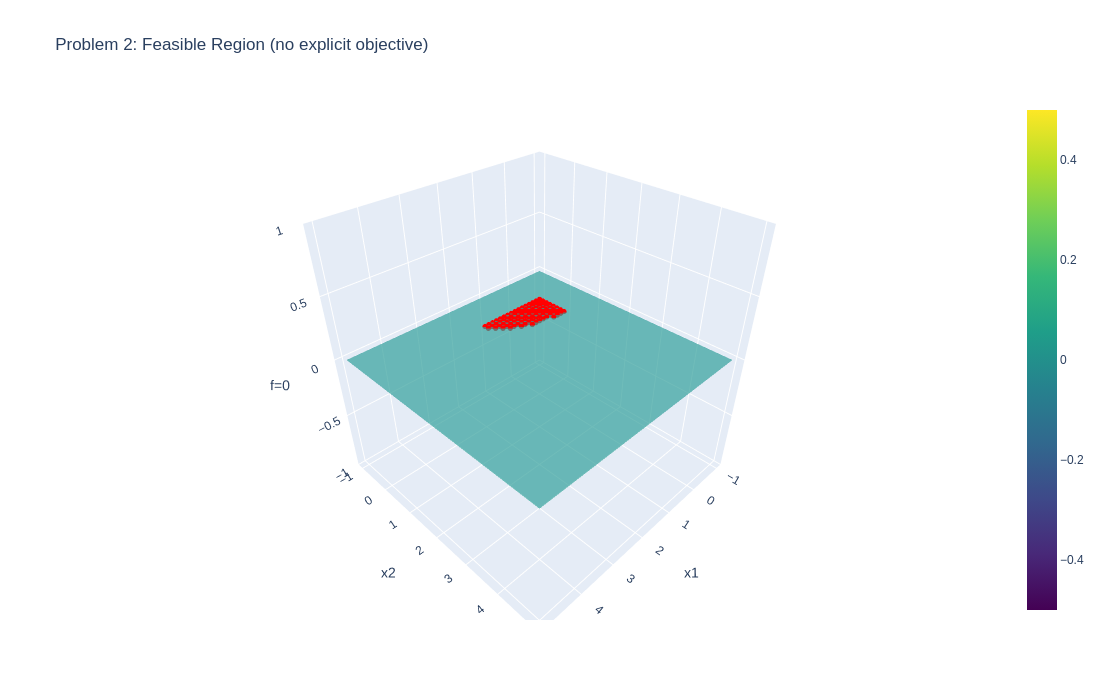

In [32]:
# -----------------------------
# 1) Visualize the feasible set
# -----------------------------
N = 50
x1_vals = np.linspace(-1, 5, N)
x2_vals = np.linspace(-1, 5, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# "Objective" is just zero, since we only want to visualize feasibility
f2 = np.zeros_like(x1_grid)

# Constraints:
#   c1(x) = 4*x2^2 + x1^2 <= 4
#   c2(x) = (x1 - 2)^2 + x2^2 <= 5
#   x1 >= 0
#   x2 >= 0
C1 = (4*(x2_grid**2) + x1_grid**2) <= 4
C2 = ((x1_grid - 2)**2 + x2_grid**2) <= 5
C3 = (x1_grid >= 0)
C4 = (x2_grid >= 0)

feasible_mask_2 = C1 & C2 & C3 & C4

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f2, feasible_mask_2,
    title="Problem 2: Feasible Region (no explicit objective)",
    x1_name="x1", x2_name="x2", z_name="f=0"
)

## Problem 3(b)

**Objective**  
$f(x_1, x_2) \;=\; -0.1 (x_1 - 4)^2 \;+\; x_2^2$

**Constraint**  
$1 - x_1^2 - x_2^2 \;\le\; 0
\quad\Longrightarrow\quad
x_1^2 + x_2^2 \;\ge\; 1$

We will visualize the 3D surface and the feasible region \(\{(x_1,x_2): x_1^2 + x_2^2 \ge 1\}.\)

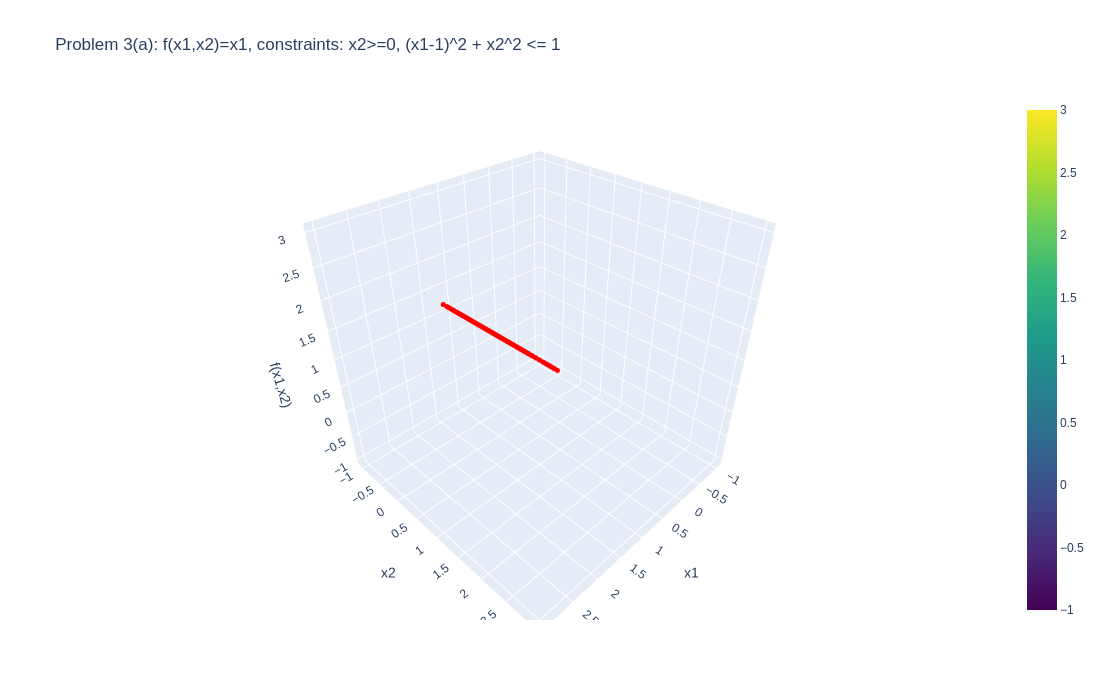

In [34]:
# --- Problem 3(a) ---
N = 50
x1_vals = np.linspace(-1, 3, N)
x2_vals = np.linspace(-1, 3, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

f3a = x1_grid  # objective is just x1

C1 = (x2_grid >= 0)
C2 = ((x1_grid - 1)**2 + x2_grid**2) <= 1

feasible_mask_3a = C1 & C2

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f3a, feasible_mask_3a,
    title="Problem 3(a): f(x1,x2)=x1, constraints: x2>=0, (x1-1)^2 + x2^2 <= 1",
    x1_name="x1", x2_name="x2", z_name="f(x1,x2)"
)

## Problem 3(b)

**Objective**  
$f(x_1, x_2) \;=\; -0.1 (x_1 - 4)^2 \;+\; x_2^2$

**Constraint**  
$1 - x_1^2 - x_2^2 \;\ge\; 0
\quad\Longrightarrow\quad
x_1^2 + x_2^2 \;\le\; 1$

We will visualize the 3D surface and the feasible region $(\{(x_1,x_2): x_1^2 + x_2^2 \ge 1\})$

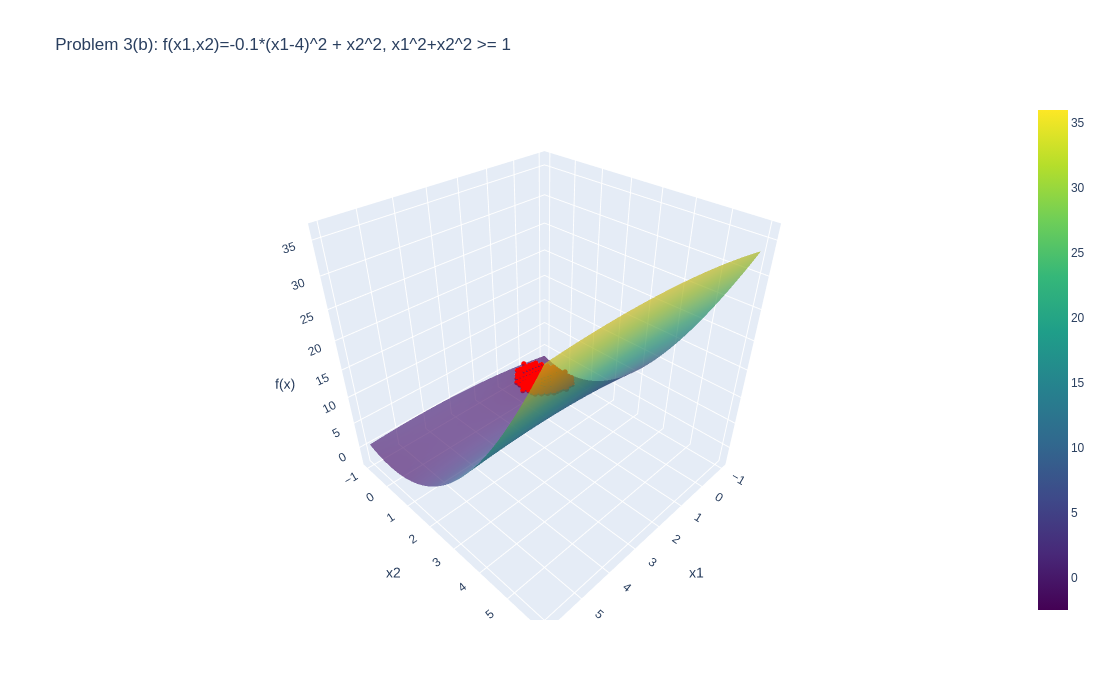

In [66]:
# --- Problem 3(b) ---
N = 50
x1_vals = np.linspace(-1, 6, N)
x2_vals = np.linspace(-1, 6, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

f3b = -0.1*(x1_grid - 4)**2 + x2_grid**2

# Constraint: x1^2 + x2^2 >= 1
C1 = (x1_grid**2 + x2_grid**2) <= 1

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f3b, C1,
    title="Problem 3(b): f(x1,x2)=-0.1*(x1-4)^2 + x2^2, x1^2+x2^2 >= 1",
    x1_name="x1", x2_name="x2", z_name="f(x)"
)

## Problem 4

**Problem Statement**  
Find a point on the parabola 
$y \;=\; \tfrac{1}{5}\,(x - 1)^2$
that is closest to \((1, 2)\) in the Euclidean norm.  

**Objective**  
$\text{distance}^2 \;=\; (x_1 - 1)^2 + (x_2 - 2)^2$

**Constraint**  
$x_2 \;=\; \tfrac{1}{5}\,(x_1 - 1)^2$

To visualize in 3D, we treat the constraint as 
$(\;|\,x_2 - \tfrac{1}{5}(x_1 - 1)^2| \approx 0)$
over a grid. We highlight where the parabola lies on that grid.

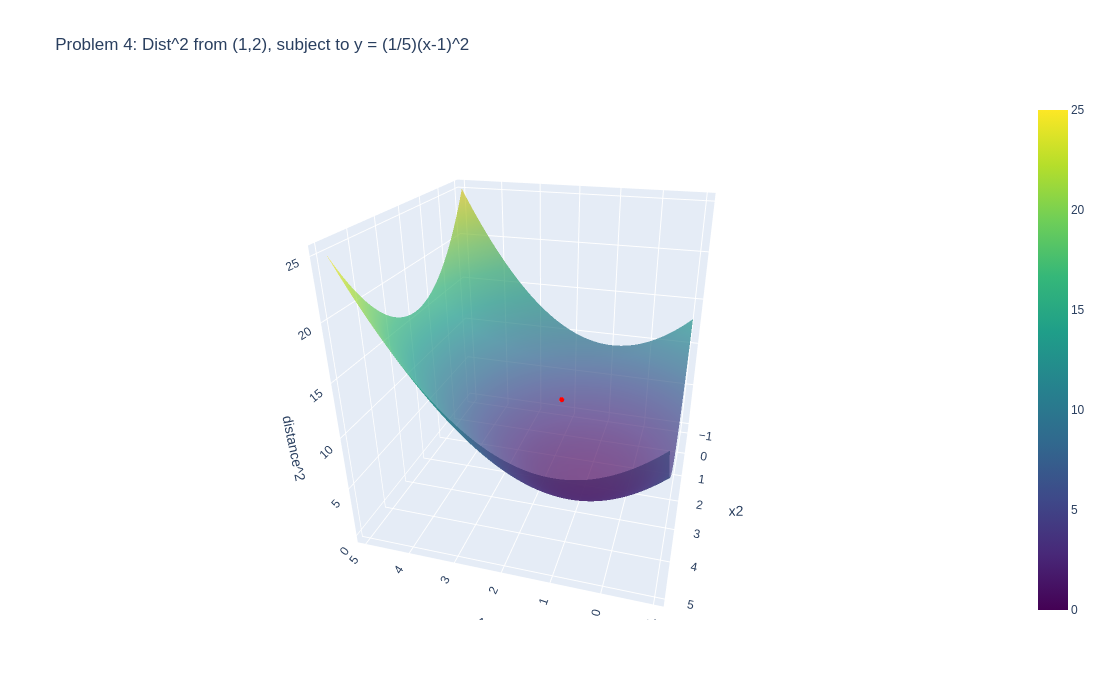

In [52]:
# --- Problem 4 ---
N = 80
x1_vals = np.linspace(-1, 5, N)
x2_vals = np.linspace(-1, 5, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# Objective: squared distance from (1, 2)
f4 = (x1_grid - 1)**2 + (x2_grid - 2)**2

# Constraint: x2 == (1/5)*(x1 - 1)^2
epsilon = 1e-3
C1 = np.abs(x2_grid - (1/5)*(x1_grid - 1)**2) < epsilon

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f4, C1,
    title="Problem 4: Dist^2 from (1,2), subject to y = (1/5)(x-1)^2",
    x1_name="x1", x2_name="x2", z_name="distance^2"
)

## Problem 5

**Objective**  
$f(x_1, x_2) \;=\; x_1\,x_2$

**Constraint**  
$x_1^2 + x_2^2 \;\le\; 1
\quad(\text{the unit disk})$

We will display the surface \(z = x_1 x_2\) over a suitable grid, then highlight 
all $((x_1, x_2))$ inside the unit circle.

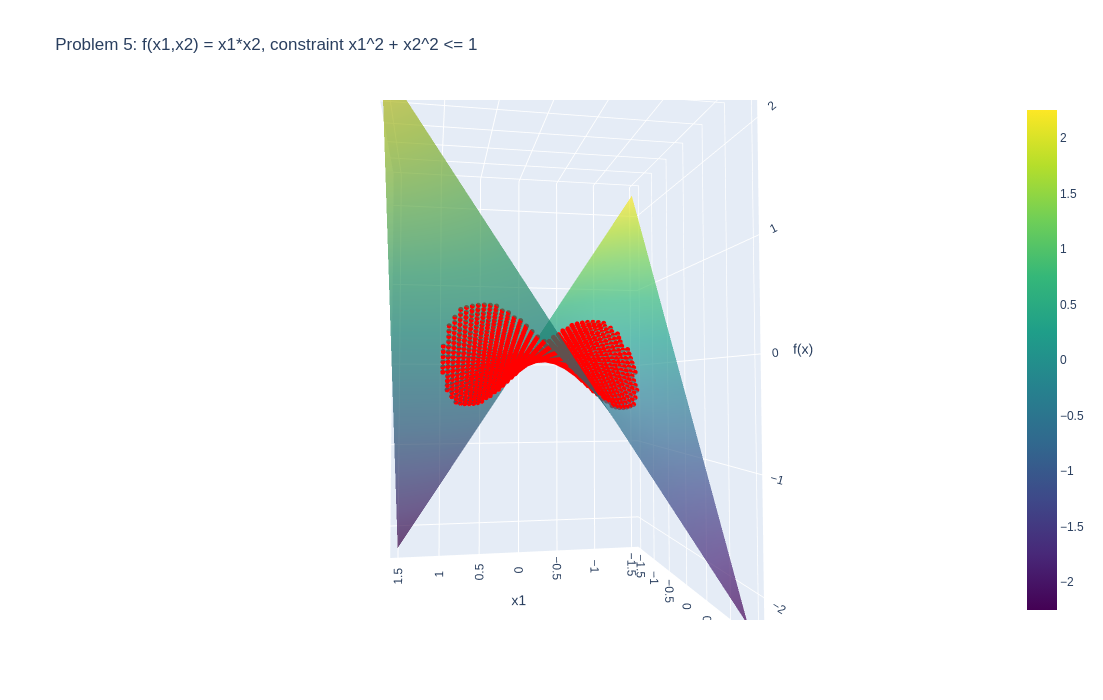

In [55]:
# --- Problem 5 ---
N = 60
x1_vals = np.linspace(-1.5, 1.5, N)
x2_vals = np.linspace(-1.5, 1.5, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

f5 = x1_grid * x2_grid

C1 = (x1_grid**2 + x2_grid**2) <= 1

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f5, C1,
    title="Problem 5: f(x1,x2) = x1*x2, constraint x1^2 + x2^2 <= 1",
    x1_name="x1", x2_name="x2", z_name="f(x)"
)

## Problem 6

**Objective**  
$f(x_1, x_2) \;=\; x_1 + x_2$

**Constraints**  
1. $(2 - x_1^2 - x_2^2 \;\ge\; 0) ⟹ (x_1^2 + x_2^2 \;\le\; 2)$  
2. $(x_2 \;\ge\; 0)$

We visualize $(z = x_1 + x_2)$ over a region containing the disk $(x_1^2 + x_2^2 \le 2)$
(but only the upper half, since $(x_2 \ge 0)$).

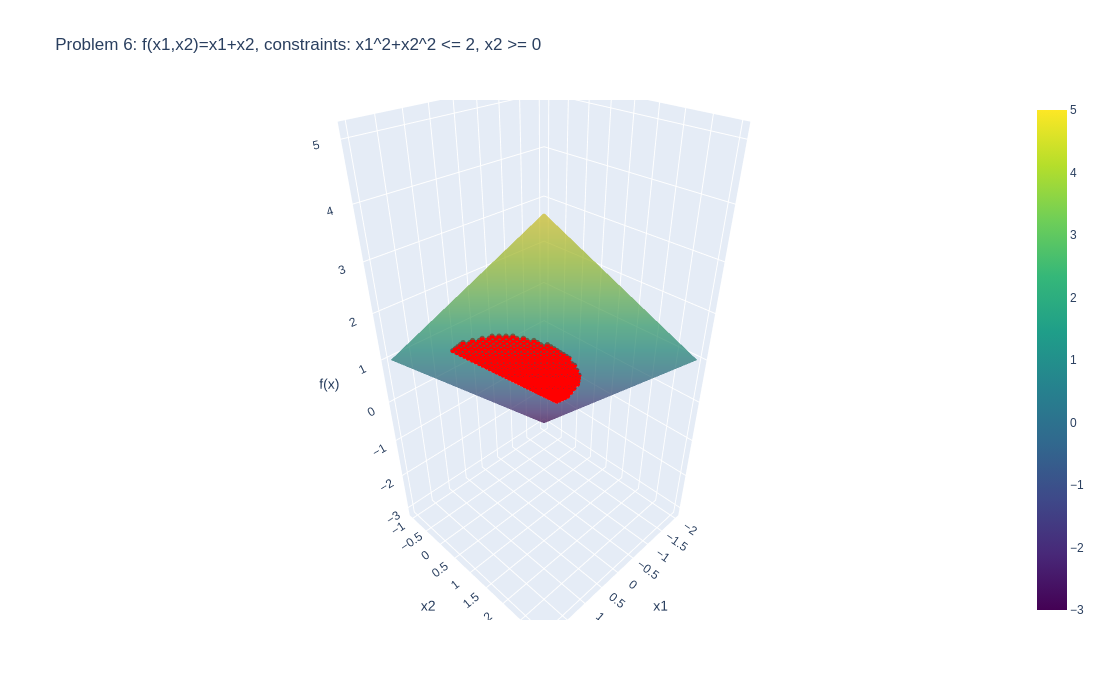

In [60]:
# --- Problem 6 ---
N = 50
x1_vals = np.linspace(-2, 2, N)
x2_vals = np.linspace(-1, 3, N)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

f6 = x1_grid + x2_grid

C1 = (x1_grid**2 + x2_grid**2) <= 2
C2 = (x2_grid >= 0)

feasible_mask_6 = C1 & C2

plot_3d_surface_and_feasible(
    x1_grid, x2_grid, f6, feasible_mask_6,
    title="Problem 6: f(x1,x2)=x1+x2, constraints: x1^2+x2^2 <= 2, x2 >= 0",
    x1_name="x1", x2_name="x2", z_name="f(x)"
)

# Conclusion

The above plots provide an **interactive** (rotate/zoom) 3D view of each problem's objective function 
and feasible set. Feel free to adjust:
- The ranges of x1, x2
- The resolution (N)
- Color schemes

to refine or broaden your view.